In [1]:
from __future__ import print_function
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [133]:
x = torch.Tensor(5,3)

In [7]:
x = torch.rand(5,3)
y = torch.rand(5,3)

In [11]:
z = torch.add(x,y)

In [134]:
x.size

<function size>

In [13]:
x[:,1]


 0.7681
 0.9637
 0.2564
 0.8820
 0.5872
[torch.FloatTensor of size 5]

In [14]:
x.numpy()

array([[ 0.56280112,  0.76805365,  0.3887673 ],
       [ 0.07373468,  0.96371746,  0.24416225],
       [ 0.84277052,  0.25641882,  0.39973351],
       [ 0.74261779,  0.88199574,  0.298226  ],
       [ 0.35237446,  0.58722335,  0.12827311]], dtype=float32)

In [15]:
a = torch.ones(5)

In [16]:
b = a.numpy()

In [17]:
a.add_(1)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

In [20]:
x = Variable(torch.ones(2,2), requires_grad=True)

In [27]:
y = x+2
print(y)

In [36]:
z = y*y*3
out = z.mean()

In [37]:
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [38]:
out.backward()

In [39]:
print (x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [40]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)
y = x*2
while y.data.norm() < 1000:
    y = y*2
print(y)

Variable containing:
 -231.8607
 1125.8729
  952.9343
[torch.FloatTensor of size 3]



In [43]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)
print (x.grad)
x.size()

Variable containing:
  409.6000
 4096.0000
    0.4096
[torch.FloatTensor of size 3]



torch.Size([3])

In [45]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        #kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #affine op: y = Wx + b
        self.fc1 = nn.Linear(16*5*5, 120) #?
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self, x):
        #max pool over (2,2)
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] #all dim except the batch
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [47]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [48]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
1.00000e-02 *
  1.5750 -9.2274  3.3692 -4.9788 -9.0237 -7.2504 -0.2868  5.1664 -5.1951  2.7544
[torch.FloatTensor of size 1x10]



In [49]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [50]:
output = net(input)
target = Variable(torch.arange(1, 11))
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

Variable containing:
 38.6936
[torch.FloatTensor of size 1]



In [54]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
 -2.5096
 -4.4165
  1.4453
 -1.4708
  2.5417
 -0.5340
[torch.FloatTensor of size 6]



In [56]:
optimizer = optim.SGD(net.parameters(), lr = 0.01)

#training loop
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

In [58]:
print(net.conv1.bias)

Parameter containing:
1.00000e-02 *
  0.1575
 -6.9096
  0.3891
  4.5371
  9.9998
  8.4328
[torch.FloatTensor of size 6]



In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),
                                                                           (0.5, 0.5, 0.5))])

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,
                                       transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plane   dog  frog  bird


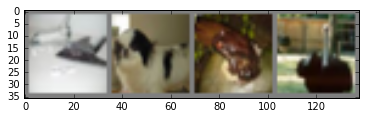

In [7]:
def imshow(img):
    img = img/2 + 0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

#get random train image
dataiter  = iter(trainloader)
images, labels = dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 3 input image channel, 6 output channels, 5x5 square convolution
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)


In [14]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        #zero gradient
        optimizer.zero_grad()
        #fwd + bwd + optim
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i%2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished !')

[1,  2000] loss: 2.206
[1,  4000] loss: 1.876
[1,  6000] loss: 1.690
[1,  8000] loss: 1.554
[1, 10000] loss: 1.527
[1, 12000] loss: 1.462
[2,  2000] loss: 1.390
[2,  4000] loss: 1.358
[2,  6000] loss: 1.319
[2,  8000] loss: 1.295
[2, 10000] loss: 1.282
[2, 12000] loss: 1.245
Finished !


GroundTruth:    cat  ship  ship plane


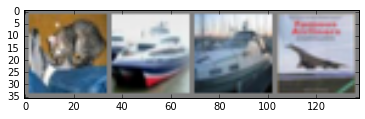

In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()
#print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
outputs = net(Variable(images))

In [17]:
_, predicted = torch.max(outputs.data, 1)

In [18]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j][0]] for j in range(4)))

Predicted:    cat plane  ship plane


In [19]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [20]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 64 %
Accuracy of  bird : 25 %
Accuracy of   cat : 46 %
Accuracy of  deer : 31 %
Accuracy of   dog : 52 %
Accuracy of  frog : 76 %
Accuracy of horse : 48 %
Accuracy of  ship : 59 %
Accuracy of truck : 61 %


In [21]:
class RNN(nn.Module):
    def __init__(self, data_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        input_size = data_size + hidden_size
        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        
    def forward(self, data, last_hidden):
        input = torch.cat((data, last_hidden), 1)
        hidden = self.i2h(input)
        output = self.h2o(hidden)
        return hidden, output

rnn = RNN(50,20,10)

print(rnn)

RNN (
  (i2h): Linear (70 -> 20)
  (h2o): Linear (20 -> 10)
)


In [22]:
loss_fn = nn.MSELoss()
batch_size = 10
TIMESTEPS = 5

#fake data
batch = Variable(torch.randn(batch_size, 50))
hidden = Variable(torch.zeros(batch_size, 20))
target = Variable(torch.zeros(batch_size, 10))

loss = 0
for t in range(TIMESTEPS):
    hidden, ouput = rnn(batch, hidden)
    loss += loss_fn(ouput, target)
loss.backward()

In [23]:
ls data/data/

eng-fra.txt  names/


In [24]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob

In [25]:
def findFiles(path):
    return glob.glob(path)
print(findFiles('data/data/names/*.txt'))

[u'data/data/names/Spanish.txt', u'data/data/names/Vietnamese.txt', u'data/data/names/Polish.txt', u'data/data/names/Portuguese.txt', u'data/data/names/French.txt', u'data/data/names/Dutch.txt', u'data/data/names/Italian.txt', u'data/data/names/Scottish.txt', u'data/data/names/Japanese.txt', u'data/data/names/German.txt', u'data/data/names/Chinese.txt', u'data/data/names/Czech.txt', u'data/data/names/Arabic.txt', u'data/data/names/Russian.txt', u'data/data/names/Irish.txt', u'data/data/names/Korean.txt', u'data/data/names/Greek.txt', u'data/data/names/English.txt']


In [26]:
import unicodedata
import string

In [27]:
all_letters = string.ascii_letters + ".,;"
n_letters = len(all_letters)

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )


In [28]:
print(unicodeToAscii('Ślusàrski'))

Slusarski


In [92]:
category_lines = {}
all_categories = []

def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

In [93]:
for filename in findFiles('data/data/names/*.txt'):
    category = filename.split('/')[-1].split('.')[0]
    #print(category, filename)
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
n_categories = len(all_categories)

Spanish data/data/names/Spanish.txt
Vietnamese data/data/names/Vietnamese.txt
Polish data/data/names/Polish.txt
Portuguese data/data/names/Portuguese.txt
French data/data/names/French.txt
Dutch data/data/names/Dutch.txt
Italian data/data/names/Italian.txt
Scottish data/data/names/Scottish.txt
Japanese data/data/names/Japanese.txt
German data/data/names/German.txt
Chinese data/data/names/Chinese.txt
Czech data/data/names/Czech.txt
Arabic data/data/names/Arabic.txt
Russian data/data/names/Russian.txt
Irish data/data/names/Irish.txt
Korean data/data/names/Korean.txt
Greek data/data/names/Greek.txt
English data/data/names/English.txt


In [99]:
print('# categories:', n_categories, all_categories)
print(unicodeToAscii("O'Néàl"))
#print(category_lines['Italian'][:5]), all_categories

# categories: 18 [u'Spanish', u'Vietnamese', u'Polish', u'Portuguese', u'French', u'Dutch', u'Italian', u'Scottish', u'Japanese', u'German', u'Chinese', u'Czech', u'Arabic', u'Russian', u'Irish', u'Korean', u'Greek', u'English']
ONeal


In [35]:
def letterToIndex(letter):
    return all_letters.find(letter)

def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

#<line_len x 1 x n_letters>
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))
print(lineToTensor('Jones').size())



Columns 0 to 12 
    0     0     0     0     0     0     0     0     0     0     0     0     0

Columns 13 to 25 
    0     0     0     0     0     0     0     0     0     0     0     0     0

Columns 26 to 38 
    0     0     0     0     0     0     0     0     0     1     0     0     0

Columns 39 to 51 
    0     0     0     0     0     0     0     0     0     0     0     0     0

Columns 52 to 54 
    0     0     0
[torch.FloatTensor of size 1x55]

torch.Size([5, 1, 55])


In [195]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax()
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden),1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return Variable(torch.zeros(1, self.hidden_size))

In [196]:
n_hidden  = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [96]:
print(rnn)

RNN (
  (i2h): Linear (183 -> 128)
  (i2o): Linear (183 -> 18)
  (softmax): LogSoftmax ()
)


In [42]:
input = Variable(letterToTensor('A'))
hidden = Variable(torch.zeros(1, n_hidden))
output, next_hidden = rnn(input, hidden)

In [48]:
input = Variable(lineToTensor('Albert'))
hidden = Variable(torch.zeros(1, n_hidden))
output, next_hidden = rnn(input[0], hidden)
print(output)

Variable containing:

Columns 0 to 9 
-3.0289 -2.9161 -2.8382 -2.8709 -3.0167 -2.9215 -3.0417 -2.9567 -3.0002 -2.9940

Columns 10 to 18 
-3.0158 -2.8964 -2.9201 -2.8957 -2.8830 -3.0652 -2.8771 -2.8652 -2.9840
[torch.FloatTensor of size 1x19]



In [59]:
def categoryFromOutput(output):
    top_n, top_i = output.data.topk(1)
    category_i = top_i[0][0]
    return all_categories[category_i], category_i

In [60]:
print(categoryFromOutput(output))

(u'Vietnamese', 2)


In [197]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l)-1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = Variable(torch.LongTensor([all_categories.index(category)]))
    line_tensor = Variable(lineToTensor(line))
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category=', category, '/ line=', line)

category= Spanish / line= Ochoa
category= Irish / line= Sullivan
category= Vietnamese / line= Than
category= Portuguese / line= Fonseca
category= Russian / line= Russkikh
category= Russian / line= Likhovtsev
category= Scottish / line= Morrison
category= Chinese / line= Won
category= Vietnamese / line= Vo
category= Italian / line= Dioli


In [63]:
criterion = nn.NLLLoss() # why appropriate for softmax loss

In [198]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    loss = criterion(output, category_tensor)
    loss.backward()
    #update parameters
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    return output, loss.data[0]

In [199]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s/60)
    s -= m*60;
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct= '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter,iter/n_iters *100,
                                               timeSince(start), loss, 
                                               line,guess, correct))
        
    if iter % plot_every == 0:
        all_losses.append(current_loss/plot_every)
        current_loss = 0

5000 5% (0m 15s) 2.5927 Adlersflugel / Russian ✗ (German)
10000 10% (0m 30s) 3.1788 Jiang / Japanese ✗ (Chinese)
15000 15% (0m 46s) 0.9994 Chau / Vietnamese ✓
20000 20% (1m 2s) 1.9536 Ngai / Chinese ✗ (Korean)
25000 25% (1m 18s) 2.1751 Carroll / French ✗ (English)
30000 30% (1m 34s) 2.0802 Pasternack / Czech ✗ (Polish)
35000 35% (1m 50s) 0.1657 Arihyoshi / Japanese ✓
40000 40% (2m 5s) 2.8667 Severins / Italian ✗ (Dutch)
45000 45% (2m 21s) 1.3120 Chlebek / Polish ✓
50000 50% (2m 37s) 0.6551 Chavez / Spanish ✓
55000 55% (2m 52s) 4.0322 Ross / Portuguese ✗ (Scottish)
60000 60% (3m 7s) 0.4688 Hadad / Arabic ✓
65000 65% (3m 23s) 1.0016 Suh / Korean ✓
70000 70% (3m 39s) 0.2982 Rodrigues / Portuguese ✓
75000 75% (3m 54s) 3.1410 John / Korean ✗ (English)
80000 80% (4m 10s) 1.7683 Naoimhin / Russian ✗ (Irish)
85000 85% (4m 25s) 5.0187 Tobias / Greek ✗ (German)
90000 90% (4m 39s) 1.9374 Tannous / Portuguese ✗ (Arabic)
95000 95% (4m 54s) 1.5073 Suero / Portuguese ✗ (Spanish)
100000 100% (5m 10s) 

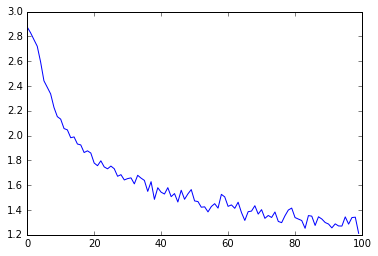

In [100]:
import matplotlib.ticker as ticker
plt.figure()
plt.plot(all_losses)

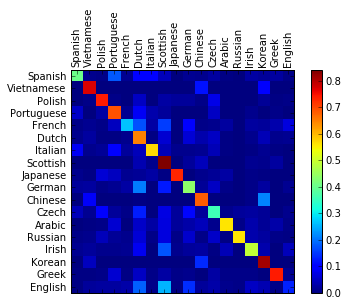

In [101]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000
def evaluate(line_tensor):
    hidden = rnn.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    return output

#fill confusion matrix
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1
    
#normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i]/confusion[i].sum()

#set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))



In [205]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    output = evaluate(Variable(lineToTensor(input_line)))
    topv, topi = output.data.topk(n_predictions, 1, True)
    predictions = []
    for i in range(n_predictions):
        value = topv[0][i]
        category_index = topi[0][i]
        print('(%.2f) %s' % (value, all_categories[category_index]))
        predictions.append([value, all_categories[category_index]])


In [209]:
predict('Agoritsa')
predict('Ioanna')
predict('Andreas')


> Agoritsa
(-1.06) Italian
(-1.19) Spanish
(-1.72) Greek

> Ioanna
(-1.18) Italian
(-1.28) Spanish
(-1.89) Czech

> Andreas
(-1.28) Spanish
(-1.79) Portuguese
(-1.90) French


In [203]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    output = evaluate(Variable(lineToTensor(input_line)))

    # Get top N categories
    topv, topi = output.data.topk(n_predictions, 1, True)
    predictions = []

    for i in range(n_predictions):
        value = topv[0][i]
        category_index = topi[0][i]
        print('(%.2f) %s' % (value, all_categories[category_index]))
        predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')
predict('Helios')
predict('Polyzou')
predict('Karypis')
predict('Christakapoulou')
predict('Sakura')


> Dovesky
(-0.74) Czech
(-0.96) Russian
(-2.52) English

> Jackson
(-0.23) Scottish
(-2.50) English
(-3.15) Russian

> Satoshi
(-1.10) Arabic
(-1.59) Japanese
(-1.81) Italian

> Helios
(-0.79) Greek
(-1.59) Arabic
(-1.99) Scottish

> Polyzou
(-0.65) Greek
(-1.94) Polish
(-2.14) Czech

> Karypis
(-0.17) Greek
(-3.37) Scottish
(-3.37) Portuguese

> Christakapoulou
(-0.01) Greek
(-6.10) Polish
(-6.23) Italian

> Sakura
(-0.44) Arabic
(-1.24) Japanese
(-4.00) Czech


In [115]:
all_categories

[u'Spanish',
 u'Vietnamese',
 u'Polish',
 u'Portuguese',
 u'French',
 u'Dutch',
 u'Italian',
 u'Scottish',
 u'Japanese',
 u'German',
 u'Chinese',
 u'Czech',
 u'Arabic',
 u'Russian',
 u'Irish',
 u'Korean',
 u'Greek',
 u'English']

In [166]:
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1 # Plus EOS marker

def findFiles(path): return glob.glob(path)

# Turn a Unicode string to plain ASCII, thanks to http://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# Build the category_lines dictionary, a list of lines per category
category_lines = {}
all_categories = []
for filename in findFiles('data/data/names/*.txt'):
    category = filename.split('/')[-1].split('.')[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

print('# categories:', n_categories, all_categories)
print(unicodeToAscii("O'Néàl"))


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(n_categories + input_size + hidden_size,
                            hidden_size)
        self.i2o = nn.Linear(n_categories + input_size + hidden_size,
                            output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax()
    
    def forward(self, category, input, hidden):
        input_combined = torch.cat((category, input, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return Variable(torch.zeros(1, self.hidden_size))

# categories: 18 [u'Spanish', u'Vietnamese', u'Polish', u'Portuguese', u'French', u'Dutch', u'Italian', u'Scottish', u'Japanese', u'German', u'Chinese', u'Czech', u'Arabic', u'Russian', u'Irish', u'Korean', u'Greek', u'English']
O'Neal


In [117]:
def randomTrainingPair():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    return category, line

In [118]:
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

#first to end, (not including EOS)
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

#second to end (EOS)
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1,len(line))]
    letter_indexes.append(n_letters -1) #EOS
    return torch.LongTensor(letter_indexes)

In [120]:
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = Variable(categoryTensor(category))
    input_line_tensor = Variable(inputTensor(line))
    target_line_tensor = Variable(targetTensor(line))
    return category_tensor, input_line_tensor, target_line_tensor

In [153]:
criterion = nn.NLLLoss()
learning_rate = 0.0005
def train(category_tensor, input_line_tensor, target_line_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()
    loss = 0
    for i in range(input_line_tensor.size()[0]):
        output, hidden = rnn(category_tensor, input_line_tensor[i],
                            hidden)
        loss += criterion(output, target_line_tensor[i])
    loss.backward()
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    return output, loss.data[0]/input_line_tensor.size()[0]

In [164]:
rnn = RNN(n_letters, 128, n_letters)
print(rnn)

RNN (
  (i2h): Linear (205 -> 128)
  (i2o): Linear (205 -> 59)
  (o2o): Linear (187 -> 59)
  (dropout): Dropout (p = 0.1)
  (softmax): LogSoftmax ()
)


In [165]:
n_iters = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0

start =time.time()
for iter in range(1, n_iters + 1):
    category_tensor, input_line_tensor, target_line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, input_line_tensor, target_line_tensor)
    total_loss += loss
    
    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 35s (5000 5%) 3.4913
1m 11s (10000 10%) 3.3182
1m 46s (15000 15%) 2.9956
2m 22s (20000 20%) 2.0581
2m 57s (25000 25%) 2.7977
3m 34s (30000 30%) 1.8802
4m 8s (35000 35%) 2.1118
4m 44s (40000 40%) 2.0370
5m 20s (45000 45%) 2.0828
5m 56s (50000 50%) 2.3373
6m 33s (55000 55%) 2.3929
7m 9s (60000 60%) 2.0639
7m 44s (65000 65%) 2.3191
8m 19s (70000 70%) 2.5249
8m 54s (75000 75%) 1.4773
9m 30s (80000 80%) 2.8418
10m 6s (85000 85%) 2.3177
10m 41s (90000 90%) 1.9043
11m 18s (95000 95%) 2.4075
11m 53s (100000 100%) 3.1337


In [167]:
print(n_letters)

59


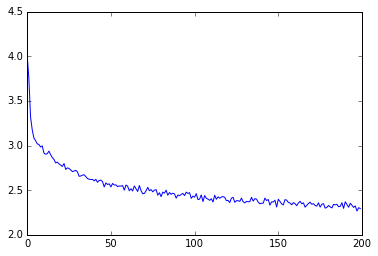

In [168]:
plt.figure()
plt.plot(all_losses)

In [182]:
max_length=20

def sample(category, start_letter='A'):
    category_tensor = Variable(categoryTensor(category))
    input = Variable(inputTensor(start_letter))
    hidden = rnn.initHidden()
    
    output_name = start_letter
    
    for i in range(max_length):
        output, hidden = rnn(category_tensor, 
                             input[0], hidden)
        topv, topi = output.data.topk(1)
        topi = topi[0][0]
        if topi == n_letters -1:
            break
        else:
            letter = all_letters[topi]
            output_name += letter
        input = Variable(inputTensor(letter))
    return output_name


def samples(category, start_letters='ABC'):
    for start_letter in start_letters:
        print(sample(category, start_letter))
        



In [192]:
samples('Greek','CHIGANQWRSD')

Caros
Hantos
Ianis
Garisos
Allisis
Namani
Qanias
Wallas
Roski
Santosoulos
Danis


In [193]:
samples('Japanese', 'CHIGANQWRSD')

Chamaka
Hamaka
Iaka
Gamama
Antaia
Nakia
Qamaka
Wouma
Rakia
Sakia
Damiakia


In [194]:
samples('Indian', 'afm')

ValueError: u'Indian' is not in list

In [204]:
del(oput)

NameError: name 'oput' is not defined

In [210]:
oput

NameError: name 'oput' is not defined